# Simulation notebook
This notebook is used for testing the Zambezi model on the single run *simulation* (not optimization) mode. Three solutions that contain the already optimized policy parameter configurations (with respect to the best of three objectives) are used to run the simulations.

In [1]:
import os
os.chdir('../src')
from model_zambezi_SIM import model_zambezi
from utils import utils

In [2]:
optimized_policy_set = ['best_hydro', 'best_env', 'best_irr']

for policy in optimized_policy_set:
    ZambeziProblem = model_zambezi(policy_sim=policy)
    policy_input_parameters = utils.loadVector('../testDecisions/decisions_'+policy+'.txt',
                                               ZambeziProblem.getNvar)
    ZambeziProblem.evaluate(policy_input_parameters)

# Plotting

Below code block will be used to plot some of the actual physical quantities (summary releases across reservoirs, irrigation per catchment, average environmental flows) based on the output files that were produced by above three simulation runs:

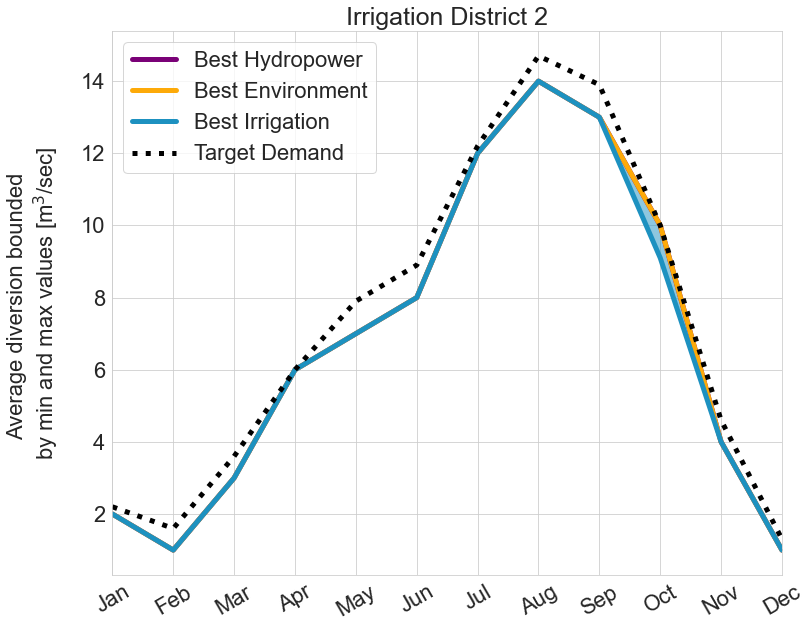

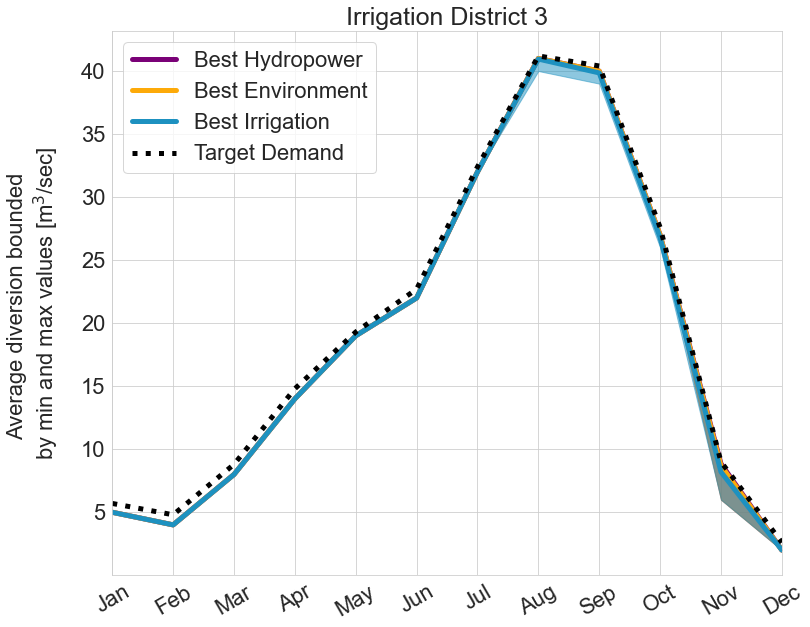

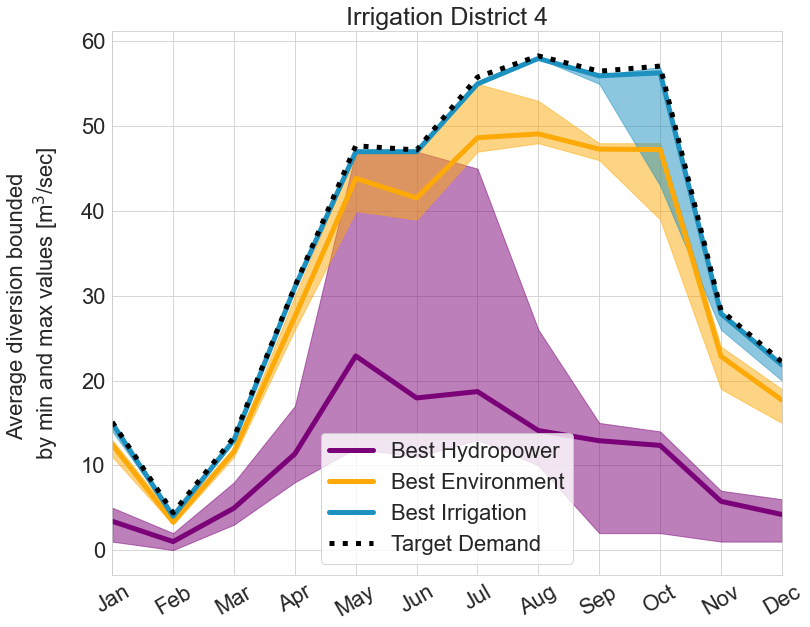

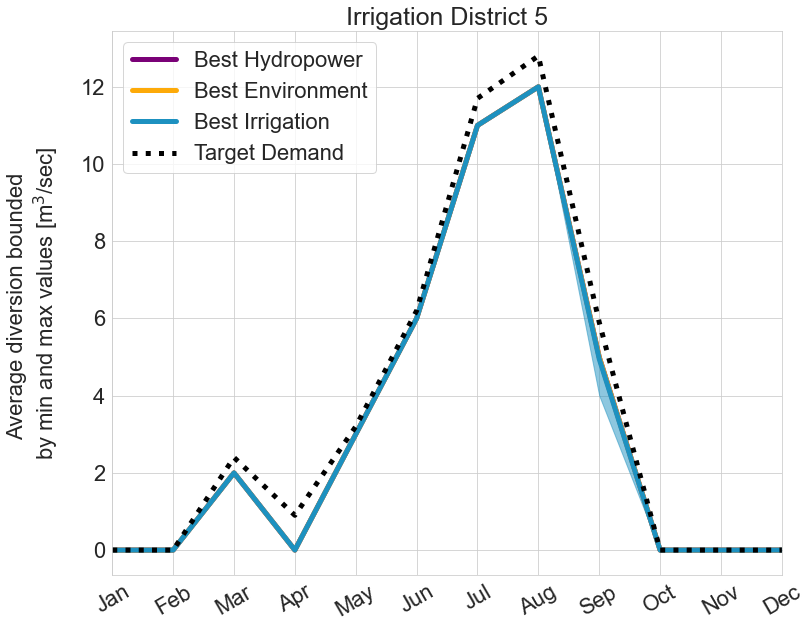

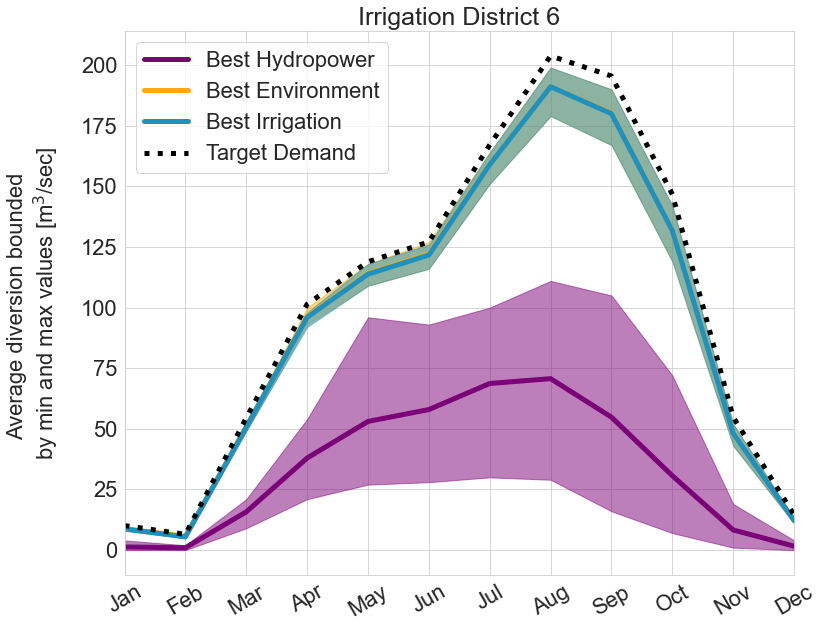

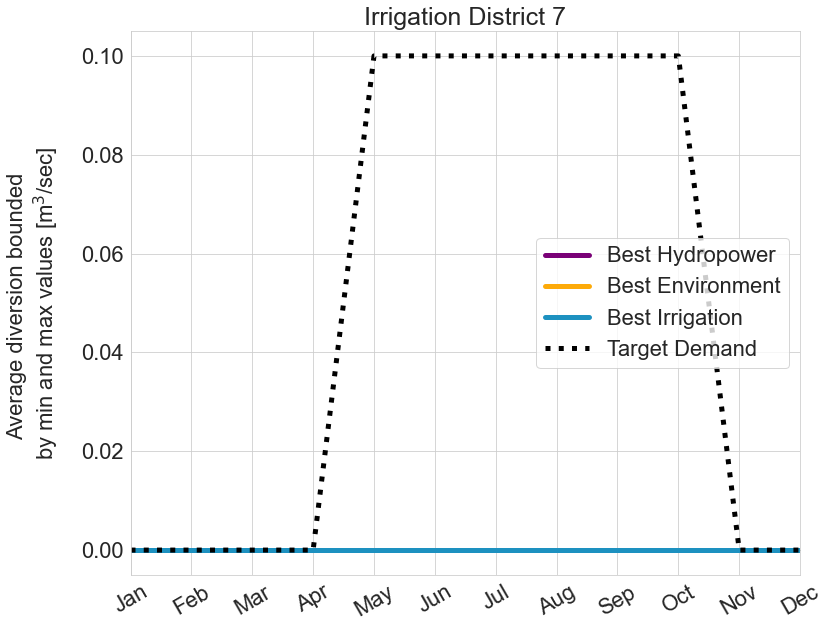

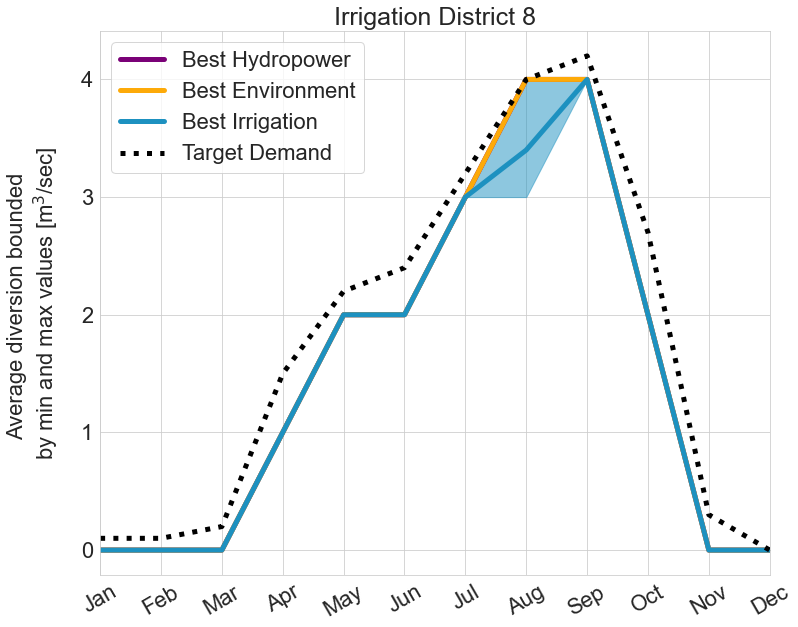

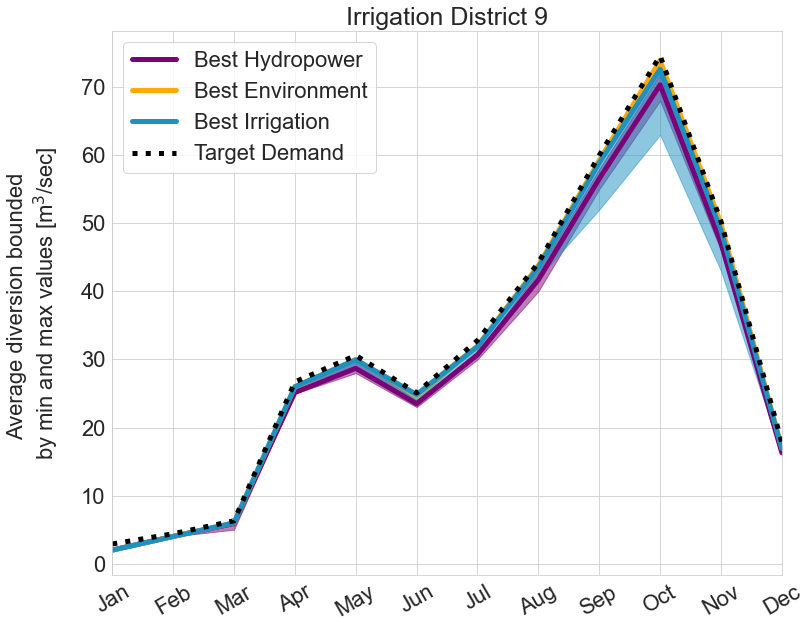

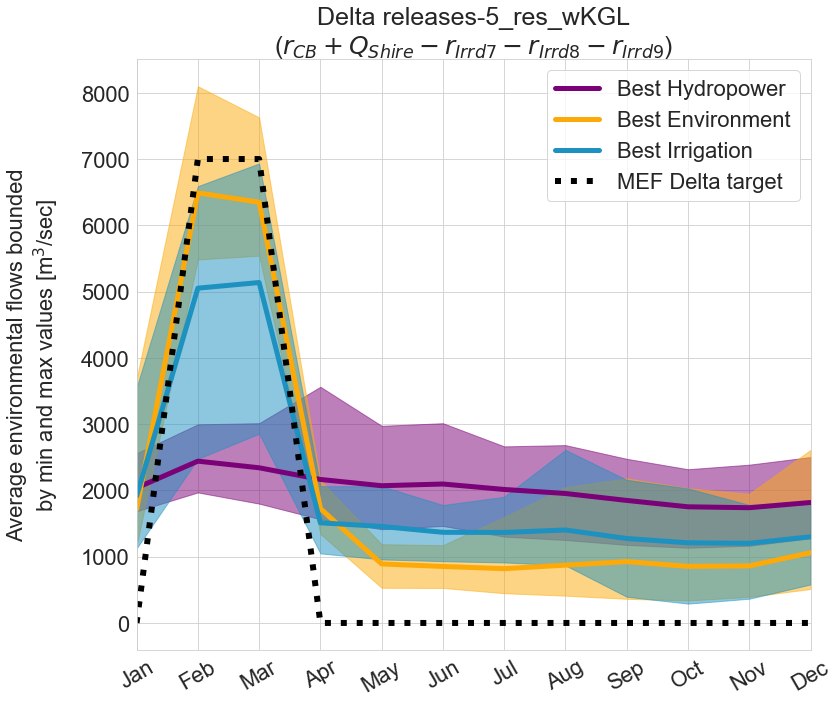

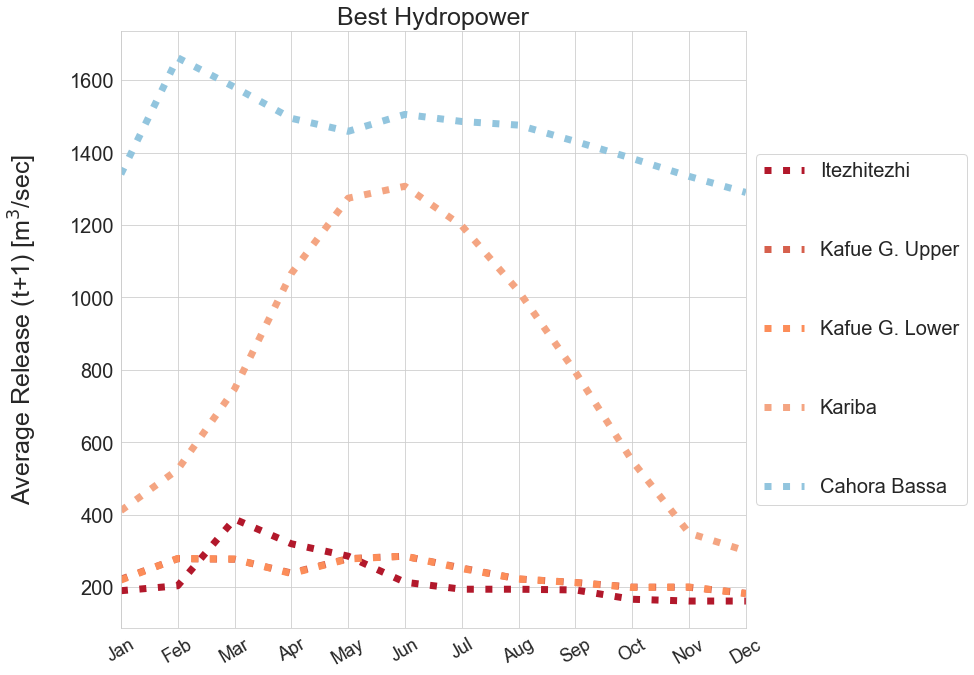

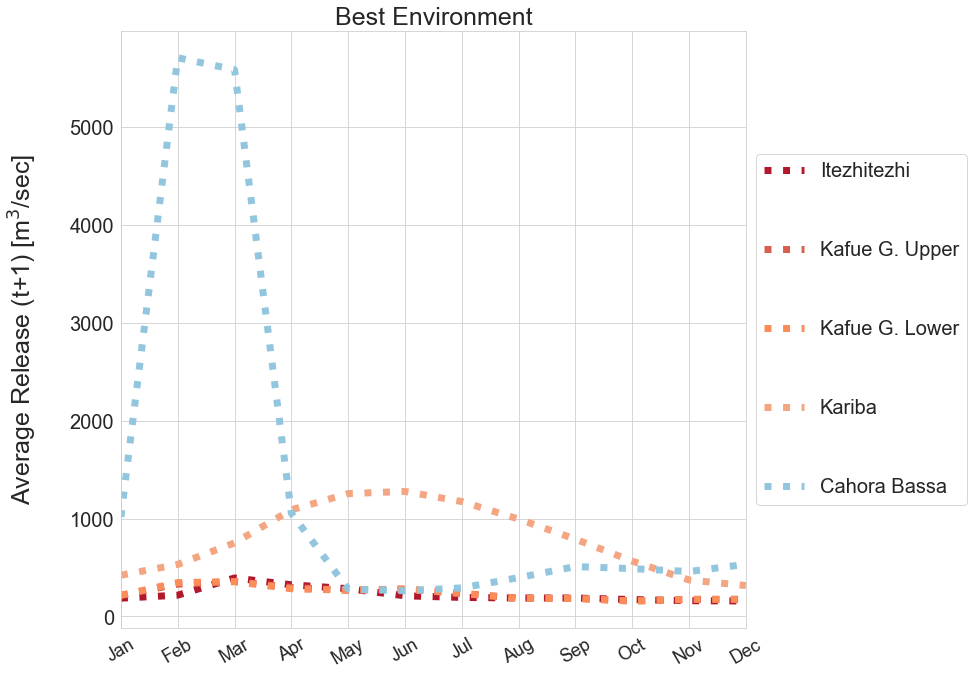

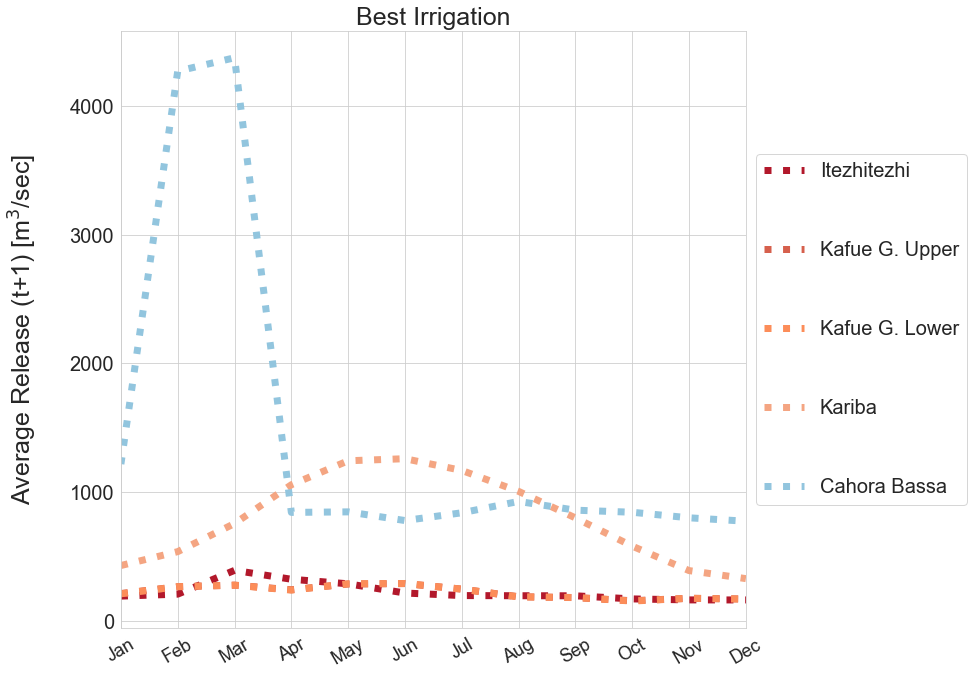

In [3]:
from various_plots import plot_quantities
plot_quantities()